In [1]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# dataset_utils specific imports
from typing import Optional, List
from joblib import Parallel, delayed
from tqdm import tqdm 

# Importing costum functions

In [14]:
from dataset_utls import find_edf_files, get_metadata_from_files, compute_metadata_statistics, create_stats_dataframe, compute_channel_stats, plot_channel_frequencies

In [ ]:
DATA_PATH = '/Users/belial/Public/OneDrive - elte.hu/ELTE/Research_Projects/P2-Anomaly_detection/TUH_EEG_Corpus_v2.0.1/'
SAMPLE_FREQ = 250
BANDPASS = (0.5, 49.0)

# General Info Related to Dataset Files

In [15]:
# print("Finding EDF files...")
def get_info_from_files(data_path: str):
    file_choices = {
        'num_epilepsy_le': ('_le', True),
        'num_epilepsy_ar': ('_ar', True),
        'num_no_epilepsy_le': ('_le', False),
        'num_no_epilepsy_ar': ('_ar', False),
        }
    num_datafiles ={
        'num_epilepsy_le': 0,
        'num_epilepsy_ar': 0,
        'num_no_epilepsy_le': 0,
        'num_no_epilepsy_ar': 0,
        }
    shared_channels = {
        'num_epilepsy_le': [],
        'num_epilepsy_ar': [],
        'num_no_epilepsy_le': [],
        'num_no_epilepsy_ar': [],
        }
    

    for k in num_datafiles.keys():
        m, e = file_choices[k][0], file_choices[k][1]
        temp, _, _ = find_edf_files(data_path, montage=m, epilepsy=e)
        num_datafiles[k] = len(temp)
        print(f'info for files with epilepsy {e} and montage {m}: {num_datafiles[k]}')
        
        # Compute the statistics using the metadata
        tmp_metadata_list = get_metadata_from_files(temp, save2csv=True, output_file=f'./info_files/metadata_{str(e)}{m}.csv')
        tmp_stat = compute_metadata_statistics(tmp_metadata_list)
        tmp_df_stats = create_stats_dataframe(tmp_stat)
        tmp_unique_sfreqs = tmp_df_stats.at[3, 'unique_values']
        tmp_shared_channels = tmp_df_stats.at[4, 'shared_channels']
        
        shared_channels[k] = tmp_shared_channels

        print(f"Unique sample rates: {tmp_unique_sfreqs}")
        print(f"Shared channels: {tmp_shared_channels}")
        print(f"shared channels count: {len(tmp_shared_channels)}")
        print(tmp_df_stats[['metric', 'mean', 'std', 'max', 'min']])

        # Compute channel frequencies and shared status
        df_channels = compute_channel_stats(tmp_metadata_list)

        # Plot
        plot_channel_frequencies(df_channels)

    print(f"Shared channels: {shared_channels}")

    return None
    print(f'info for files with epilepsy {e} and montage {m}: {num_datafiles[k]}')

# print(f"Found {len(edf_files)} EDF files.")

info for files with epilepsy True and montage _le: 106
Metadata saved to ./info_files/metadata_True_le.csv
Unique sample rates: [250.0]
Shared channels: ['EEG 30-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG CZ-LE', 'EEG EKG-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG FP1-LE', 'EEG FP2-LE', 'EEG FZ-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG OZ-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG PZ-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE']
shared channels count: 24
            metric       mean        std       max     min
0     duration_sec     821.68     592.19    2903.0    14.0
1       n_channels      39.40        NaN      41.0    32.0
2        n_samples  205419.81  148046.94  725750.0  3500.0
3      sample_rate        NaN        NaN       NaN     NaN
4  shared_channels        NaN        NaN       NaN     NaN


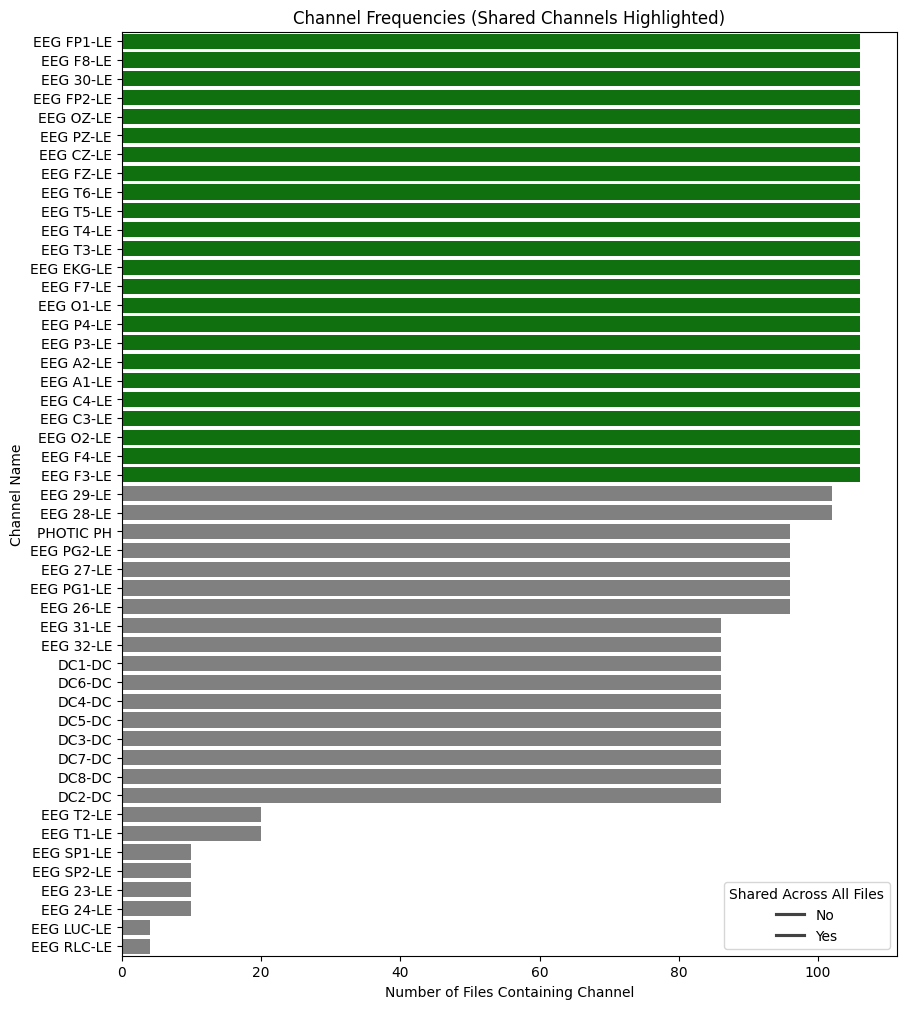

info for files with epilepsy True and montage _ar: 1679
Metadata saved to ./info_files/metadata_True_ar.csv
Unique sample rates: [250.0, 256.0, 400.0, 512.0, 1000.0]
Shared channels: ['EEG C3-REF', 'EEG C4-REF', 'EEG CZ-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG FP1-REF', 'EEG FP2-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF']
shared channels count: 17
            metric       mean        std         max    min
0     duration_sec    1085.28    3448.01     63373.0    1.0
1       n_channels      31.97        NaN        36.0   17.0
2        n_samples  311293.86  922147.63  16223488.0  256.0
3      sample_rate        NaN        NaN         NaN    NaN
4  shared_channels        NaN        NaN         NaN    NaN


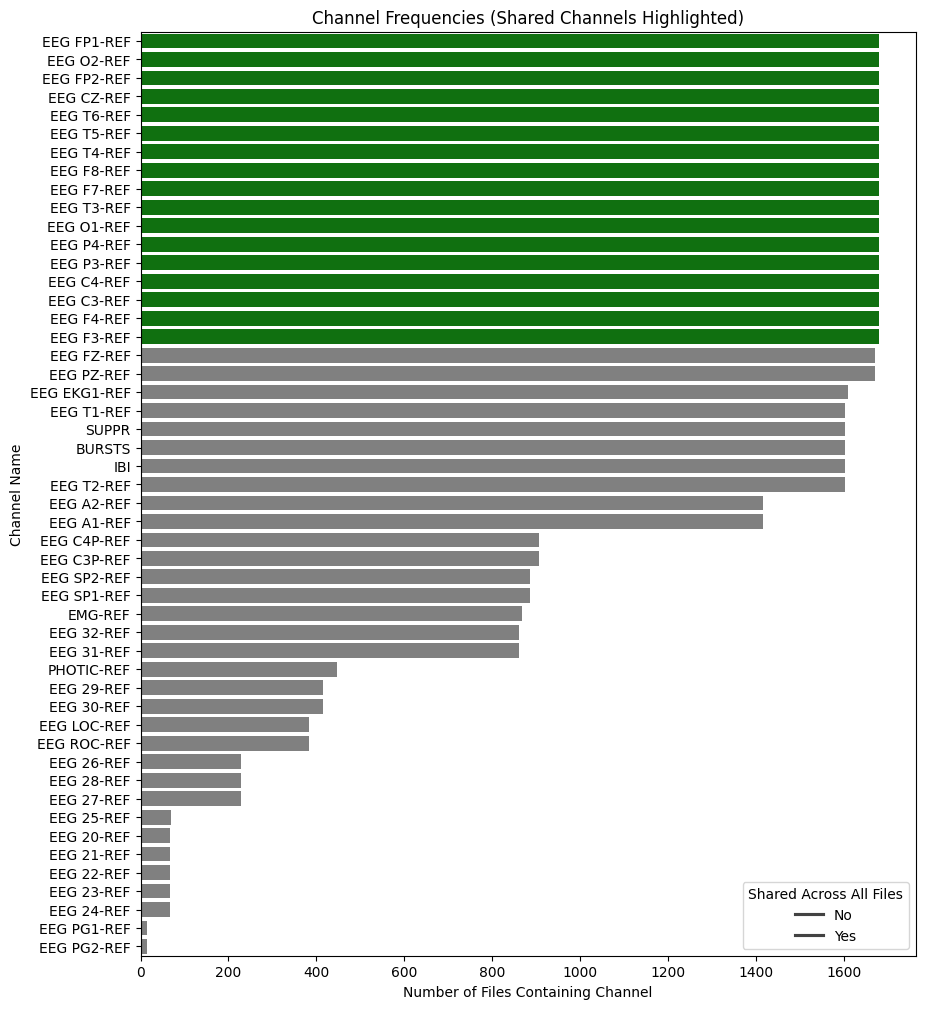

info for files with epilepsy False and montage _le: 41
Metadata saved to ./info_files/metadata_False_le.csv
Unique sample rates: [250.0]
Shared channels: ['EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG CZ-LE', 'EEG EKG-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG FP1-LE', 'EEG FP2-LE', 'EEG FZ-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG OZ-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG PZ-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE']
shared channels count: 28
            metric       mean        std       max     min
0     duration_sec     929.85     504.33    2386.0    14.0
1       n_channels      40.78        NaN      41.0    32.0
2        n_samples  232463.41  126081.96  596500.0  3500.0
3      sample_rate        NaN        NaN       NaN     NaN
4  shared_channels        NaN        NaN       NaN     NaN


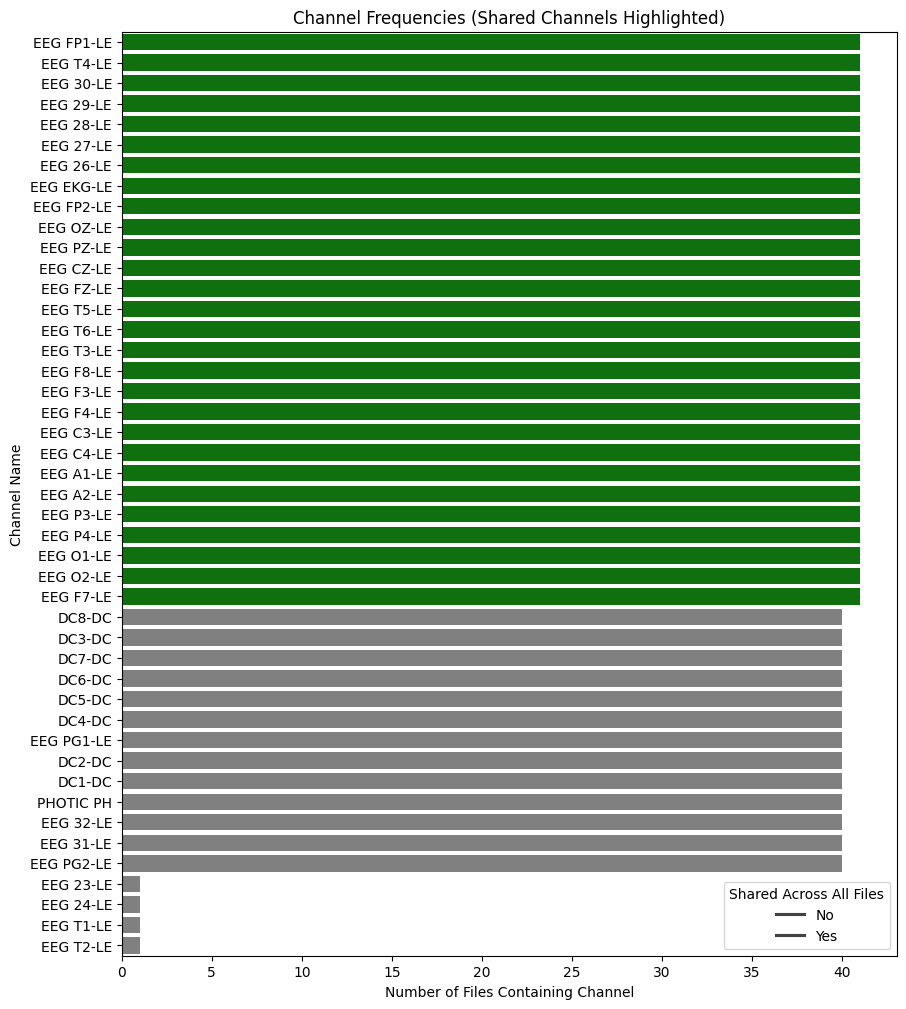

info for files with epilepsy False and montage _ar: 268
Metadata saved to ./info_files/metadata_False_ar.csv
Unique sample rates: [250.0, 256.0, 400.0, 1000.0]
Shared channels: ['EEG C3-REF', 'EEG C4-REF', 'EEG CZ-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG FP1-REF', 'EEG FP2-REF', 'EEG FZ-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG PZ-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF']
shared channels count: 19
            metric       mean        std        max    min
0     duration_sec     549.43    1139.78    11678.0    1.0
1       n_channels      33.30        NaN       36.0   30.0
2        n_samples  152203.59  320760.47  2919500.0  256.0
3      sample_rate        NaN        NaN        NaN    NaN
4  shared_channels        NaN        NaN        NaN    NaN


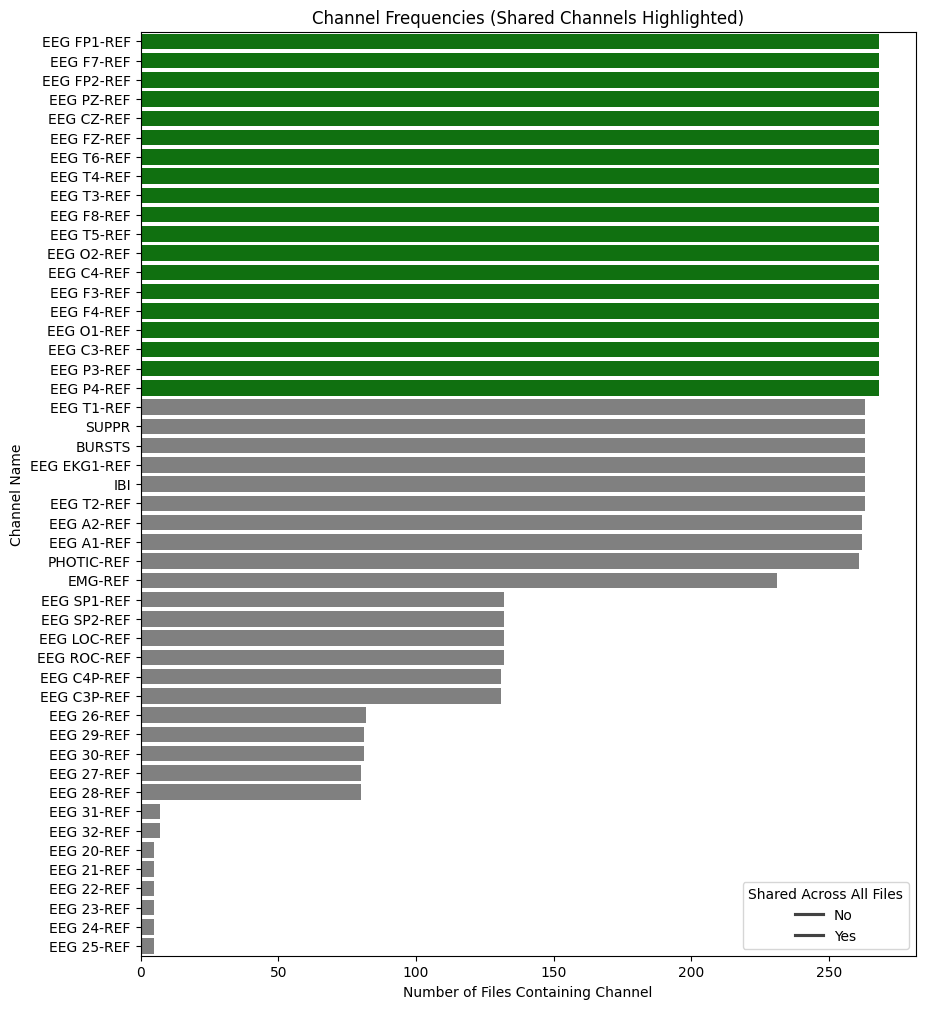

Shared channels: {'num_epilepsy_le': ['EEG 30-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG CZ-LE', 'EEG EKG-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG FP1-LE', 'EEG FP2-LE', 'EEG FZ-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG OZ-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG PZ-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE'], 'num_epilepsy_ar': ['EEG C3-REF', 'EEG C4-REF', 'EEG CZ-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG FP1-REF', 'EEG FP2-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF'], 'num_no_epilepsy_le': ['EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG CZ-LE', 'EEG EKG-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG FP1-LE', 'EEG FP2-LE', 'EEG FZ-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG OZ-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG PZ-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-

In [16]:
get_info_from_files(DATA_PATH)


In [22]:
shared_channels = {
    'num_epilepsy_le': ['EEG 30-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG CZ-LE', 'EEG EKG-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG FP1-LE', 'EEG FP2-LE', 'EEG FZ-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG OZ-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG PZ-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE'],
    'num_epilepsy_ar': ['EEG C3-REF', 'EEG C4-REF', 'EEG CZ-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG FP1-REF', 'EEG FP2-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF'],
    'num_no_epilepsy_le': ['EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG CZ-LE', 'EEG EKG-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG FP1-LE', 'EEG FP2-LE', 'EEG FZ-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG OZ-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG PZ-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE'],
    'num_no_epilepsy_ar': ['EEG C3-REF', 'EEG C4-REF', 'EEG CZ-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG FP1-REF', 'EEG FP2-REF', 'EEG FZ-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG PZ-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF']
}

# Collect all channel names from all keys into a single list
substring = ['EEG ', '-LE', '-REF']
for grp in shared_channels.keys():
    all_channels = shared_channels[grp]
    for i in range(len(all_channels)):
        for s in substring:
            all_channels[i] = all_channels[i].replace(s, '')
    shared_channels[grp] = all_channels

print("All common substrings:", shared_channels)

All common substrings: {'num_epilepsy_le': ['30', 'A1', 'A2', 'C3', 'C4', 'CZ', 'EKG', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FZ', 'O1', 'O2', 'OZ', 'P3', 'P4', 'PZ', 'T3', 'T4', 'T5', 'T6'], 'num_epilepsy_ar': ['C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'O1', 'O2', 'P3', 'P4', 'T3', 'T4', 'T5', 'T6'], 'num_no_epilepsy_le': ['26', '27', '28', '29', '30', 'A1', 'A2', 'C3', 'C4', 'CZ', 'EKG', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FZ', 'O1', 'O2', 'OZ', 'P3', 'P4', 'PZ', 'T3', 'T4', 'T5', 'T6'], 'num_no_epilepsy_ar': ['C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FZ', 'O1', 'O2', 'P3', 'P4', 'PZ', 'T3', 'T4', 'T5', 'T6']}


In [26]:
shared_channels = {
    'num_epilepsy_le': ['EEG 30-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG CZ-LE', 'EEG EKG-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG FP1-LE', 'EEG FP2-LE', 'EEG FZ-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG OZ-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG PZ-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE'],
    'num_epilepsy_ar': ['EEG C3-REF', 'EEG C4-REF', 'EEG CZ-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG FP1-REF', 'EEG FP2-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF'],
    'num_no_epilepsy_le': ['EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG CZ-LE', 'EEG EKG-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG FP1-LE', 'EEG FP2-LE', 'EEG FZ-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG OZ-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG PZ-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE'],
    'num_no_epilepsy_ar': ['EEG C3-REF', 'EEG C4-REF', 'EEG CZ-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG FP1-REF', 'EEG FP2-REF', 'EEG FZ-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG PZ-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF']
}

# Clean channel names using successive replaces
clean_patterns = ['EEG ', '-LE', '-REF']
for group in shared_channels:
    shared_channels[group] = [
        channel.replace(clean_patterns[0], '')
               .replace(clean_patterns[1], '')
               .replace(clean_patterns[2], '')
        for channel in shared_channels[group]
    ]

# Find common elements using set intersections
common_channels = set(shared_channels['num_epilepsy_le'])
for group_channels in shared_channels.values():
    common_channels &= set(group_channels)

# Sort results numerically/alphabetically
def custom_sort(s):
    return (int(s) if s.isdigit() else float('inf'), s)

sorted_channels = sorted(common_channels, key=custom_sort)

print("Common base channels across all groups:")
print(sorted_channels)

Common base channels across all groups:
['C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'O1', 'O2', 'P3', 'P4', 'T3', 'T4', 'T5', 'T6']


In [28]:
common_channels = ['C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'O1', 'O2', 'P3', 'P4', 'T3', 'T4', 'T5', 'T6', 'FZ', 'PZ']

In [29]:
common_channels = sorted(
    [
        "EEG FP1-LE",
        "EEG FP2-LE",
        "EEG F3-LE",
        "EEG F4-LE",
        "EEG C3-LE",
        "EEG C4-LE",
        "EEG P3-LE",
        "EEG P4-LE",
        "EEG O1-LE",
        "EEG O2-LE",
        "EEG F7-LE",
        "EEG F8-LE",
        "EEG T3-LE",
        "EEG T4-LE",
        "EEG T5-LE",
        "EEG T6-LE",
        "EEG FZ-LE",
        "EEG CZ-LE",
        "EEG PZ-LE",
    ]
)
print(type(common_channels), len(common_channels))

<class 'list'> 19


# Data Loading and Preprocessing Pipeline

In [30]:
# foocussing on no epilepsy and le:
edf_files, _, _ = find_edf_files(DATA_PATH, montage='_le', epilepsy=False)
metadata_list = get_metadata_from_files(edf_files)


In [38]:
from typing import Optional, List

def preprocess_eeg(
    file_path: str,
    selected_channels: Optional[List[str]] = None,
    sfreq: int = SAMPLE_FREQ,
    l_freq: float = 1.0,
    h_freq: float = 49.0,
    normalize: bool = True,
    verbose: bool = False
) -> Optional[np.ndarray]:
    """
    Args:
        file_path: Path to .edf EEG file.
        selected_channels: List of channel names to pick (optional).
        sfreq: Target sampling frequency after resampling.
        l_freq: Low cutoff for bandpass filter.
        h_freq: High cutoff for bandpass filter.
        normalize: If True, apply Z-score normalization per channel.
        verbose: Log preprocessing steps.

    Returns:
        Preprocessed data as numpy array (channels × samples), or None if processing fails.
    """
    try:
        raw = mne.io.read_raw_edf(file_path, preload=True, verbose=verbose)
    except Exception as e:
        print(f"Error loading {file_path}: {str(e)}")
        return None

    # Check if selected_channels exist in the file
    if selected_channels:
        available_chs = raw.ch_names
        missing_chs = [ch for ch in selected_channels if ch not in available_chs]
        if missing_chs:
            print(f"Warning: Missing channels {missing_chs} in {file_path}. Skipping.")
            return None
        raw.pick(selected_channels)

    # Resample
    if raw.info['sfreq'] != sfreq:
        raw.resample(sfreq, verbose=verbose)

    # Bandpass filter
    raw.filter(l_freq=l_freq, h_freq=h_freq, verbose=verbose)


    # Normalize
    data = raw.get_data()
    if normalize:
        data = (data - data.mean(axis=1, keepdims=True)) / (data.std(axis=1, keepdims=True) + 1e-8)

    # Free memory
    del raw
    return data

In [39]:
from joblib import Parallel, delayed
from tqdm import tqdm  # For progress bars

def preprocess_bulk(
    file_paths: List[str],
    selected_channels: Optional[List[str]] = None,
    n_jobs: int = -1  # Use all CPU cores
) -> List[Optional[np.ndarray]]:
    return Parallel(n_jobs=n_jobs)(
        delayed(preprocess_eeg)(fp, selected_channels)
        for fp in tqdm(file_paths, desc="Processing files")
    )

In [40]:
preprocessed_data = preprocess_bulk(edf_files, selected_channels=common_channels, n_jobs=4)
valid_data = [d for d in preprocessed_data if d is not None]

Processing files: 100%|██████████| 41/41 [02:21<00:00,  3.44s/it]


In [35]:
def segment_eeg(data, sfreq=256, window_sec=2, overlap=0.5):
    """
    Segment preprocessed EEG into overlapping windows.

    Args:
        data: np.array of shape (channels, samples)
        sfreq: sampling frequency
        window_sec: window size in seconds
        overlap: fraction of overlap between windows

    Returns:
        segments: np.array of shape (num_windows, channels, window_size)
    """
    n_channels, n_samples = data.shape
    window_size = int(window_sec * sfreq)
    step_size = int(window_size * (1 - overlap))

    segments = []
    for start_idx in range(0, n_samples - window_size + 1, step_size):
        end_idx = start_idx + window_size
        window = data[:, start_idx:end_idx]
        segments.append(window)

    segments = np.stack(segments, axis=0)
    return segments

In [37]:
data_epochs = np.empty((0, len(common_channels), int(SAMPLE_FREQ)))
for i, data in enumerate(preprocessed_data):
    segments = segment_eeg(data, sfreq=SAMPLE_FREQ, window_sec=1, overlap=0.5)
    data_epochs = np.vstack((data_epochs, segments))
print(f"All data shape: {data_epochs.shape}")

All data shape: (74401, 19, 256)
